## Comparative plots between Matlab and Python modules partial results

In [1]:
from library import *

Using TensorFlow backend.
C:\Users\Ami\anaconda3\envs\rworkflow\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Ami\anaconda3\envs\rworkflow\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Ami\anaconda3\envs\rworkflow\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Ami\anaconda3\envs\rworkflow\lib

In [2]:
partialOutputPath = './partial_output_files/'

### Module geraAreas() partial results comparison

In [3]:
# time = np.loadtxt(partialOutputPath+'time_PY.csv')
time = np.loadtxt('C:\\Users\Ami\Documents\GitHub\Thesis\Traduzido\partial_output_files\\time_PY.csv')

# area_c = np.loadtxt(partialOutputPath+'area_c_PY.csv')
area_c = np.loadtxt('C:\\Users\Ami\Documents\GitHub\Thesis\Traduzido\partial_output_files\\area_c_PY.csv')

# alpha_mu_spot = np.loadtxt(partialOutputPath+'alpha_mu_spot_PY.csv')
alpha_mu_spot = np.loadtxt('C:\\Users\Ami\Documents\GitHub\Thesis\Traduzido\partial_output_files\\alpha_mu_spot_PY.csv')

alpha_mu_spot = np.reshape(alpha_mu_spot,(np.size(time),6,11))

In [4]:
alpha_mu_spot.shape

(124, 6, 11)

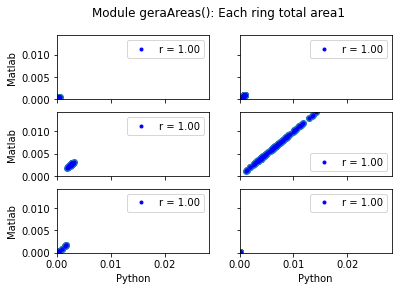

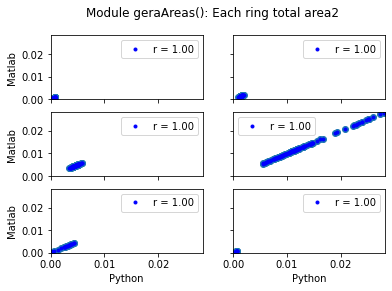

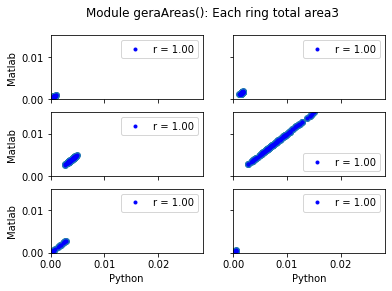

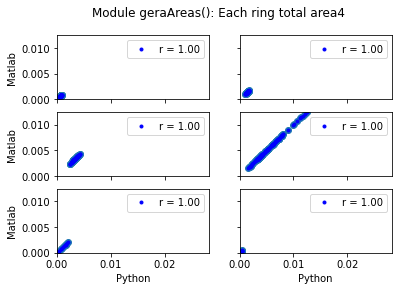

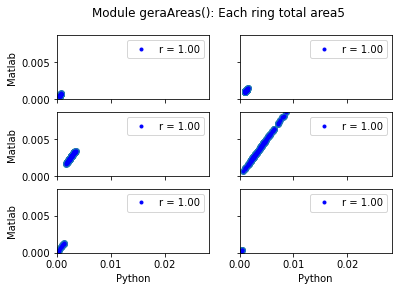

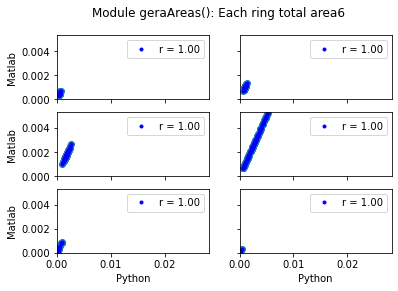

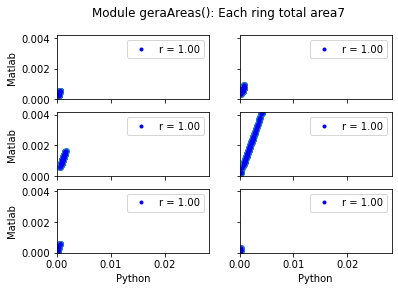

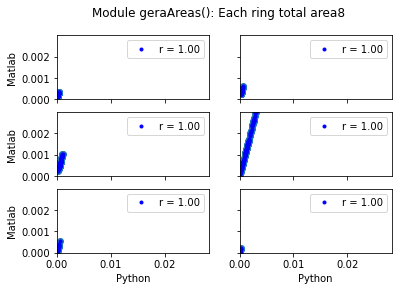

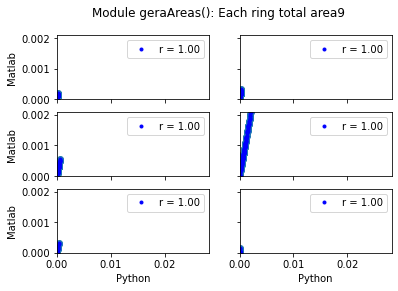

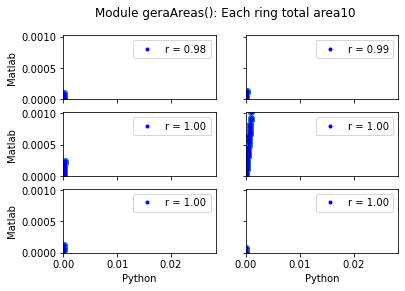

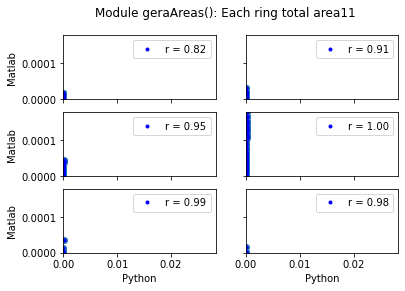

In [5]:
rTotal = []
for i in range(11):

    fig, axs = plt.subplots(3, 2, sharex=True, sharey=True)

    fig.suptitle('Module geraAreas(): Each ring total area'+str(i+1))

    #Plotando as 6 classes do anel i
#     arquivo = partialOutputPath+'alpha_mu_spot_ML'+str(i+1)+'.csv'
    arquivo = 'C:\\Users\Ami\Documents\GitHub\Thesis\Traduzido\partial_output_files\\alpha_mu_spot_ML'+str(i+1)+'.csv'
    
    alpha_mu_spot2 = np.loadtxt(arquivo)
    #print(arquivo)

    y=0
    rParcial = []

    for j in range(6):
        X = alpha_mu_spot[:,j,i]
        Y = alpha_mu_spot2[:,j]

        r = ma.corrcoef(ma.masked_invalid(X), ma.masked_invalid(Y))[0][1]
        
        rParcial.append(r)
        
        rLegend = f'r = {r:.2f}'
        #print(rLegend)
        #r = 'r = '+str(stats.pearsonr(alpha_mu_spot[:,j,i],alpha_mu_spot2[:,j])[0]) #retorna coeficiente de correlação e a probabilidade da correlação ser ao acaso.

        x = np.mod(j,2)

        axs[y*1,x].plot(X,Y, 'b.')
        axs[y*1,x].scatter(X,Y)
        axs[y*1,x].legend([rLegend], loc=0)
        axs[y*1,x].set_xlim([np.min(alpha_mu_spot),np.max(alpha_mu_spot)])
        axs[y*1,x].set_ylim([np.min(alpha_mu_spot2),np.max(alpha_mu_spot2)])
        ##plt.legend(loc='best')

        y += x

        #print('r = ',stats.pearsonr(alpha_mu_spot[:,0,i],alpha_mu_spot2[:,0]))    

    for ax in axs.flat:
        ax.set(xlabel='Python', ylabel='Matlab')

    ## Hide x labels and tick labels for top plots and y ticks for right plots.
    for ax in axs.flat:
        ax.label_outer()
    
    file = (partialOutputPath+'Ring'+str(i+1)+'.png')
    plt.savefig(file, transparent = True)
    rTotal.append(rParcial)

C:\Users\Ami\anaconda3\envs\rworkflow\lib\site-packages\ipykernel_launcher.py:52: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "padinch" which is no longer supported as of 3.3 and will become an error two minor releases later


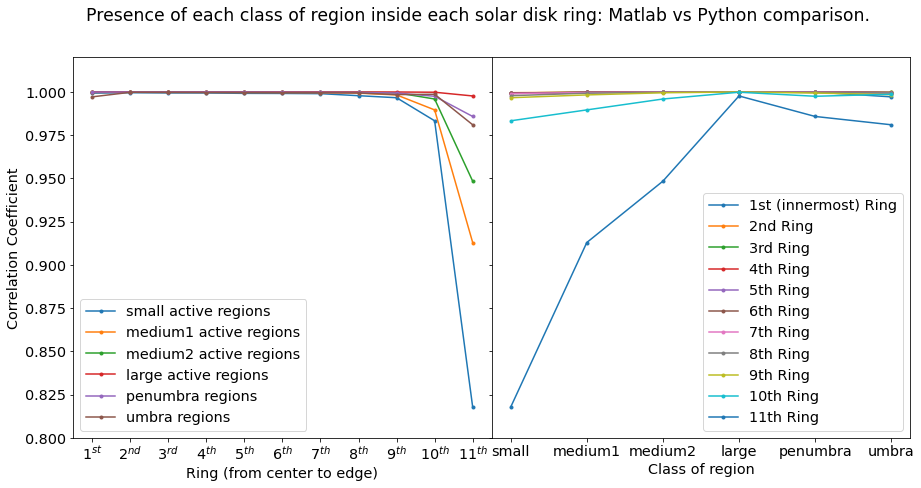

In [12]:
rTotal = np.asarray(rTotal)
fig, [ax1,ax2] = plt.subplots(1,2,figsize=(15, 7), sharey=True)
fig.subplots_adjust(wspace=0.0)

plt.suptitle("Presence of each class of region inside each solar disk ring: Matlab vs Python comparison.", fontsize='xx-large')

for i in range(6):
    ax1.plot(rTotal[:,i],'.-')
    ax1.set_ylim([0.8,1.2])


ax1.set_xlabel('Ring (from center to edge)',fontsize='x-large')
ax1.set_ylabel('Correlation Coefficient',fontsize='x-large')

ax1.set_xticks(np.arange(0, 11, 1))
ax1.set_xticklabels(['$1^{st}$','$2^{nd}$','$3^{rd}$','$4^{th}$','$5^{th}$','$6^{th}$','$7^{th}$','$8^{th}$','$9^{th}$',
                    '$10^{th}$','$11^{th}$'])

# ax1.set_title('Diferent classes of regions inside each ring',fontsize='x-large')
ax1.legend(['small active regions',
            'medium1 active regions',
            'medium2 active regions',
            'large active regions',
            'penumbra regions',
            'umbra regions'],loc=3,fontsize='x-large')
ax1.tick_params(labelsize='x-large')

for i in range(11):
    ax2.plot(rTotal[i,:],'.-')
    ax2.set_ylim([0.8,1.02])

ax2.set_xlabel('Class of region',fontsize='x-large')
# ax2.set_ylabel('Correlation Coeficient')

# ax2.set_title('Partial output comparison for each ring',fontsize='xx-large')
ax2.set_xticks(np.arange(0, 6, 1))
ax2.set_xticklabels(['small','medium1','medium2','large','penumbra','umbra'])
ax2.tick_params(labelsize='x-large')

ax2.legend(['1st (innermost) Ring',
            '2nd Ring',
            '3rd Ring',
            '4th Ring',
            '5th Ring',
            '6th Ring',
            '7th Ring',
            '8th Ring',
            '9th Ring',
            '10th Ring',
            '11th Ring'],loc=4,fontsize='x-large')

plt.savefig('./Figures/'+'partialOutputCorr.pdf',dpi=200,format='pdf',padinch=0)

### Module check_areas() partial results comparison

In [19]:
# time = np.loadtxt(partialOutputPath+'check_areas_time_PY.csv')
# area_c = np.loadtxt(partialOutputPath+'check_areas_area_c_PY.csv')
# alpha_mu_spot = np.loadtxt(partialOutputPath+'check_areas_alpha_mu_spot_PY.csv')

# alpha_mu_spot = np.reshape(alpha_mu_spot,(np.size(time),6,11))

rTotal_ca = []

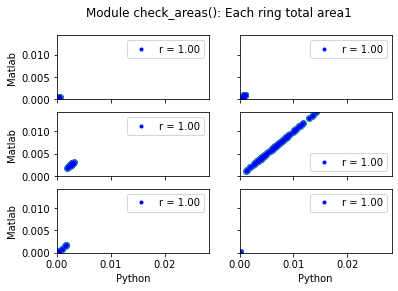

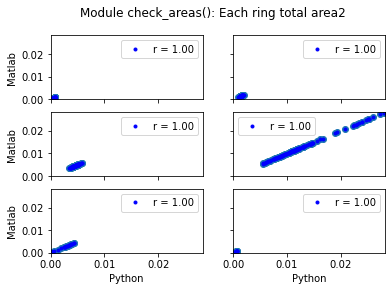

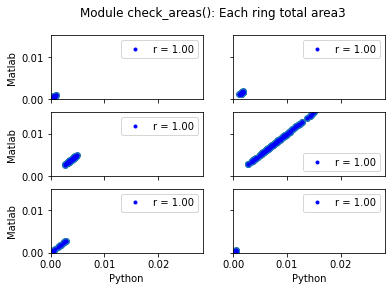

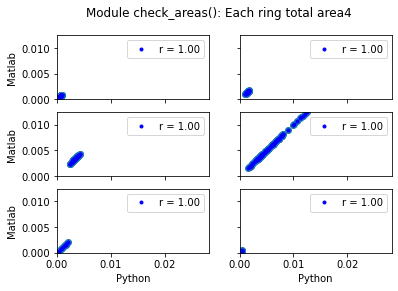

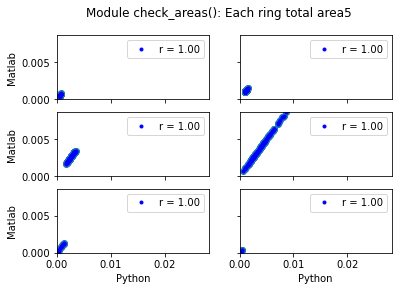

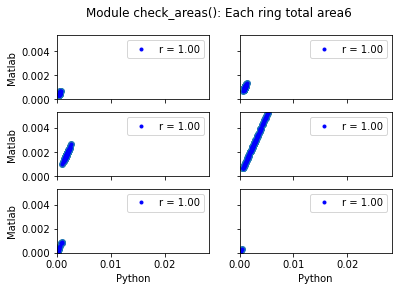

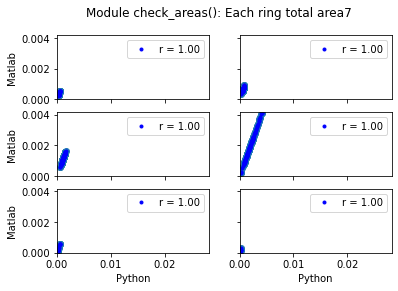

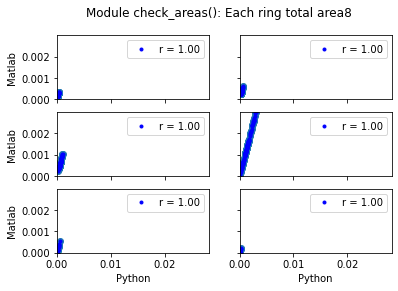

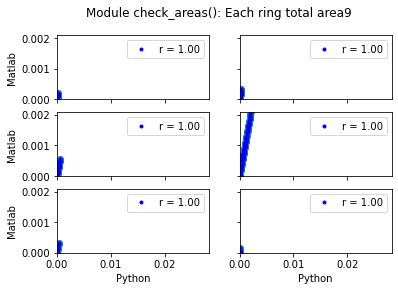

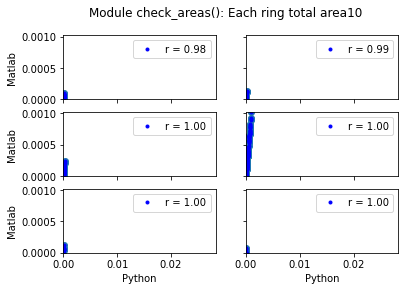

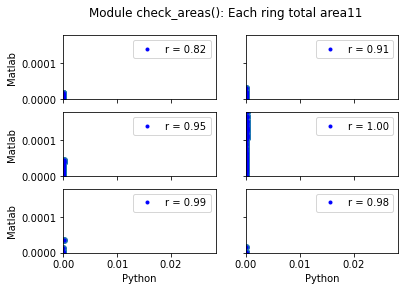

In [20]:
for i in range(11):

    fig, axs = plt.subplots(3, 2, sharex=True, sharey=True)

    fig.suptitle('Module check_areas(): Each ring total area'+str(i+1))

    #Plotando as 6 classes do anel i
#     arquivo = partialOutputPath+'alpha_mu_spot_ML'+str(i+1)+'.csv'
    arquivo = 'C:\\Users\Ami\Documents\GitHub\Thesis\Traduzido\partial_output_files\\alpha_mu_spot_ML'+str(i+1)+'.csv'
    alpha_mu_spot2 = np.loadtxt(arquivo)
    #print(arquivo)

    y=0
    rParcial = []

    for j in range(6):
        X = alpha_mu_spot[:,j,i]
        Y = alpha_mu_spot2[:,j]

        r = ma.corrcoef(ma.masked_invalid(X), ma.masked_invalid(Y))[0][1]
        
        rParcial.append(r)
        
        rLegend = f'r = {r:.2f}'
        #print(rLegend)
        #r = 'r = '+str(stats.pearsonr(alpha_mu_spot[:,j,i],alpha_mu_spot2[:,j])[0]) #retorna coeficiente de correlação e a probabilidade da correlação ser ao acaso.

        x = np.mod(j,2)

        axs[y*1,x].plot(X,Y, 'b.')
        axs[y*1,x].scatter(X,Y)
        axs[y*1,x].legend([rLegend], loc=0)
        axs[y*1,x].set_xlim([np.min(alpha_mu_spot),np.max(alpha_mu_spot)])
        axs[y*1,x].set_ylim([np.min(alpha_mu_spot2),np.max(alpha_mu_spot2)])
        ##plt.legend(loc='best')

        y += x

        #print('r = ',stats.pearsonr(alpha_mu_spot[:,0,i],alpha_mu_spot2[:,0]))    

    for ax in axs.flat:
        ax.set(xlabel='Python', ylabel='Matlab')

    ## Hide x labels and tick labels for top plots and y ticks for right plots.
    for ax in axs.flat:
        ax.label_outer()
    
    file = (partialOutputPath+'check_area_Ring'+str(i+1)+'.png')
    plt.savefig(file, transparent = True)
    rTotal_ca.append(rParcial)

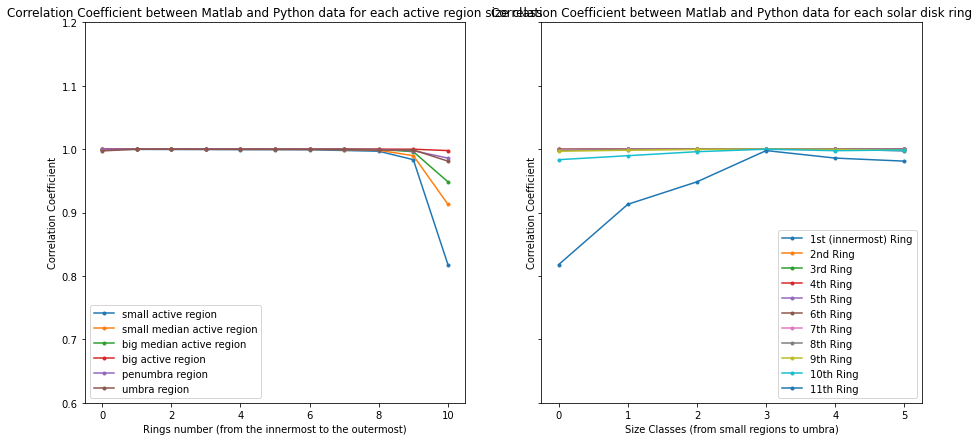

### Module model_mdi_02_03() partial results comparison: standarized and not standarized RNN input data

In [27]:
P_py = np.loadtxt('C:\\Users\Ami\Documents\GitHub\Thesis\Traduzido\partial_output_files\\P_PY.csv')
T_py = np.loadtxt('C:\\Users\Ami\Documents\GitHub\Thesis\Traduzido\partial_output_files\\T_PY.csv')
P_ml = np.loadtxt('C:\\Users\Ami\Documents\GitHub\Thesis\Traduzido\partial_output_files\\P_ML.csv')
T_ml = np.loadtxt('C:\\Users\Ami\Documents\GitHub\Thesis\Traduzido\partial_output_files\\T_ML.csv')

# Pn_py = np.loadtxt(partialOutputPath+'pn_PY.csv')
# Tn_py = np.loadtxt(partialOutputPath+'tn_PY.csv')
# Pn_ml = np.loadtxt(partialOutputPath+'pn_ML.csv')
# Tn_ml = np.loadtxt(partialOutputPath+'tn_ML.csv')

# Pn_py = Pn_py.transpose()

series_size = T_ml.size

In [28]:
print(P_ml.shape)
print(P_py.shape)
# print(Pn_ml.shape)
# print(Pn_py.shape)

(40, 123)
(40, 123)


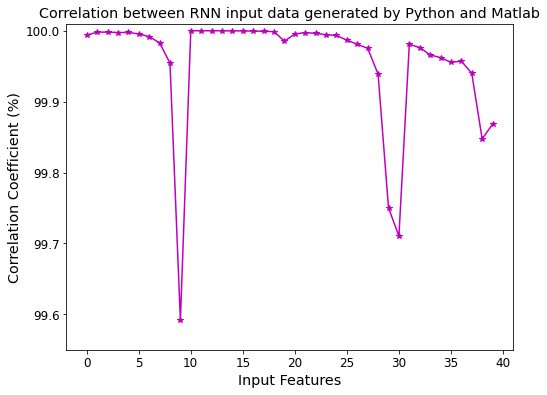

In [55]:
rTotal = []
rnTotal = []

for i in range(P_py.shape[0]):
    X = P_py[i,:]
    Y = P_ml[i,:]
    r = ma.corrcoef(ma.masked_invalid(X), ma.masked_invalid(Y))[0][1]*100
    rTotal.append(r)

#     Xn = Pn_py[i,:]
#     Yn = Pn_ml[i,:]
#     rn = ma.corrcoef(ma.masked_invalid(Xn), ma.masked_invalid(Yn))[0][1]
#     rnTotal.append(rn)
fig = plt.subplots(figsize=(8, 6))
plt.title('Correlation between RNN input data generated by Python and Matlab', fontsize='x-large')
plt.plot(rTotal,'m*-')
plt.ylim(99.55,100.01)
plt.ylabel('Correlation Coefficient (%)', fontsize='x-large')
plt.xlabel('Input Features',fontsize='x-large')
plt.yticks(fontsize='large')
plt.xticks(fontsize='large')

# ax2.plot(rnTotal,'b.-')    
# ax2.set_title('Standarized Input')
plt.savefig('./Figures/PCorr.pdf',dpi=200,format='pdf')

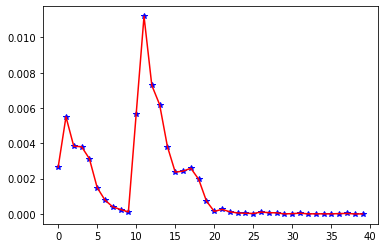

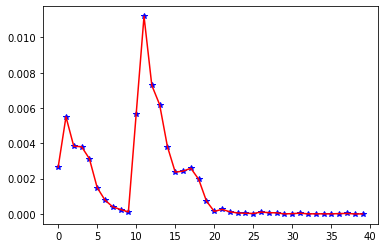

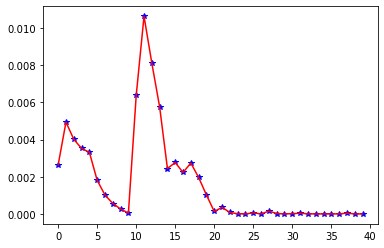

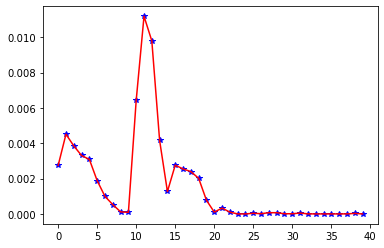

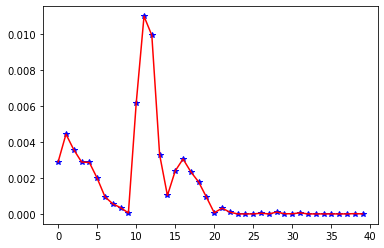

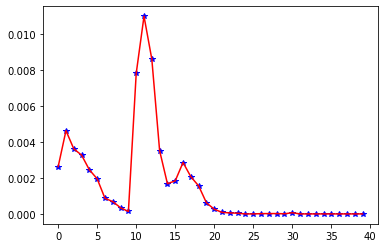

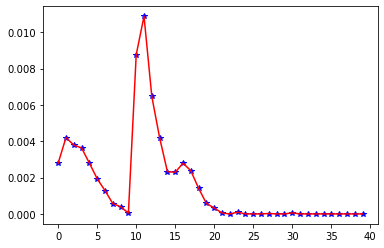

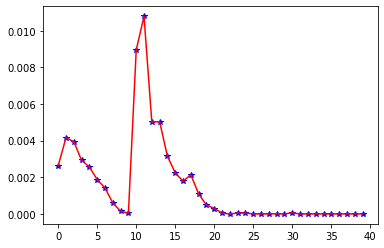

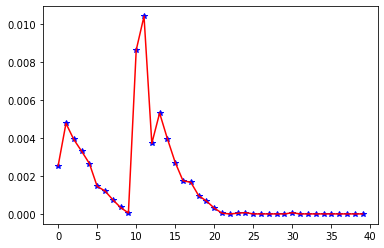

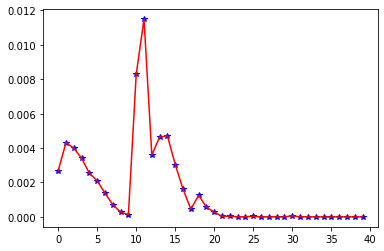

In [63]:
for i in range(10):
    plt.figure(i)
    plt.plot(range(P_py.shape[0]),P_py[:,i],'b*',range(P_py.shape[0]),P_ml[:,i],'r-')
    plt.show

In [ ]:
    figArea, axs = plt.subplots(3, 2, sharex=False, sharey=False)
    figArea.subplots_adjust(wspace=0,hspace=0.25)

    figArea.suptitle('Area sum of each class of regions in the solar disk')
    #Plotando as 6 classes do anel i
    classes = ['small','medium1','medium2','large','penumbra','umbra']
    y=0
    # rLegend=[]
    for i in range(6):

        X = area_c[:,i]
        Y = area_c2[:,i]

        minAlpha = np.min([X,Y])
        maxAlpha = np.max([X,Y])
        
        r = ma.corrcoef(ma.masked_invalid(X), ma.masked_invalid(Y))[0][1]

        # rLegend.append(f'r = {r:.2f}')
        
        rLegend = f'r = {r:.2f}'
        
        #print(rLegend)
        #r = 'r = '+str(stats.pearsonr(alpha_mu_spot[:,j,i],alpha_mu_spot2[:,j])[0]) #retorna coeficiente de correlação e a probabilidade da correlação ser ao acaso.
        
        x = np.mod(i,2)
        
        # axs[y*1,x].plot(X,Y, 'b.')
        axs[y*1,x].scatter(X,Y,c='orange')
        axs[y*1,x].plot([minAlpha, maxAlpha], 
                 [minAlpha, maxAlpha], color='black', linestyle=':', label='optimal')
        # axs[y*1,x].legend([rLegend], loc=0)
        axs[y*1,x].set_xlim([minAlpha,maxAlpha])
        axs[y*1,x].set_ylim([minAlpha,maxAlpha])
        #plt.legend(loc='best')

        axs[y*1,x].text(0.2, 0.9, classes[i], fontsize=8, horizontalalignment='center', verticalalignment='center', transform=axs[y*1,x].transAxes, color='black')
        axs[y*1,x].text(0.85, 0.1, rLegend, fontsize=8, horizontalalignment='center', verticalalignment='center', transform=axs[y*1,x].transAxes, color='black')
        axs[y*1,x].axes.xaxis.set_ticks([])
        axs[y*1,x].axes.yaxis.set_ticks([])
        
        y += x
        #print('r = ',stats.pearsonr(alpha_mu_spot[:,0,i],alpha_mu_spot2[:,0]))    
    # a=0
    for ax in axs.flat:
        ax.set(xlabel='Python', ylabel='Matlab')
        # ax.text(0.9,0.1,rLegend[a])
        # a+=1

    ## Hide x labels and tick labels for top plots and y ticks for right plots.
    for ax in axs.flat:
        ax.label_outer()

    plt.show
    file = (figuresPath+'Area.png')
    plt.savefig(file, transparent = True,dpi=200,format='png')

<function matplotlib.pyplot.show(close=None, block=None)>

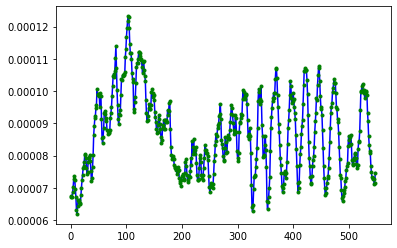

In [59]:
T_ml = T_ml.reshape(-1,1)
T_py = T_py.reshape(-1,1)

plt.plot(range(series_size),T_py,'b-',range(series_size),T_ml,'g.')
plt.show

### Module rnn() standarized RNN input data

<function matplotlib.pyplot.show(*args, **kw)>

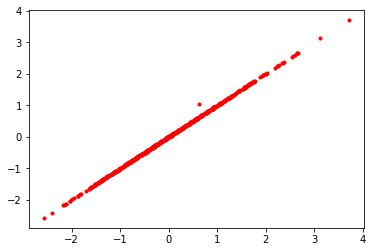

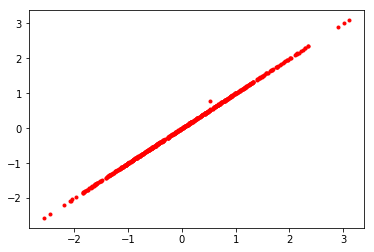

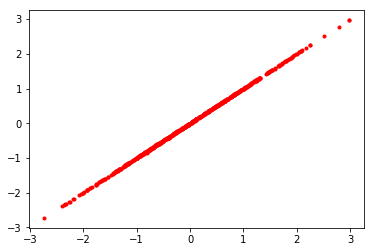

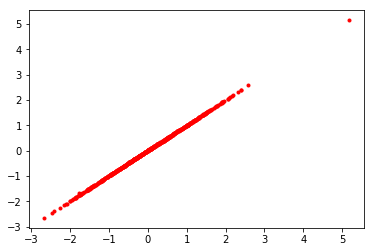

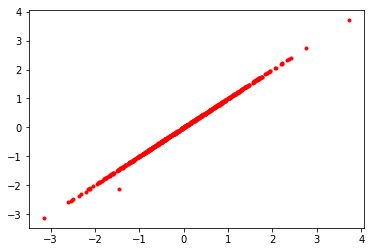

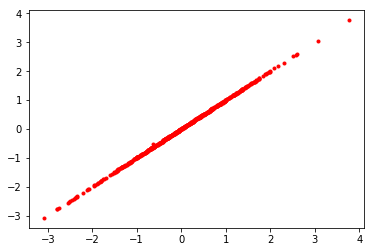

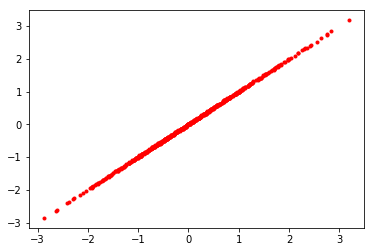

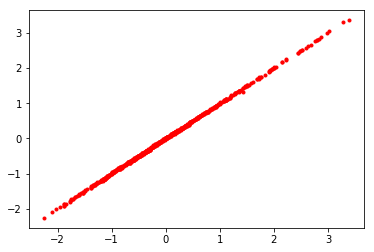

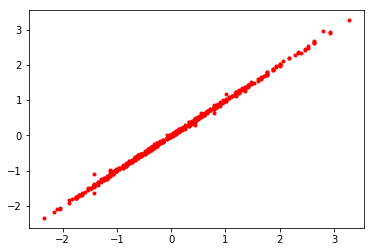

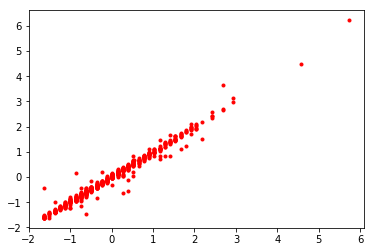

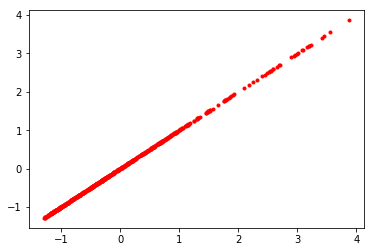

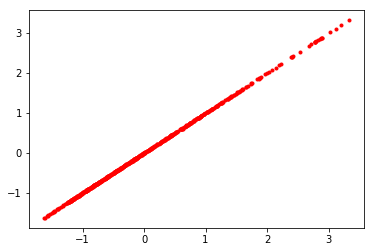

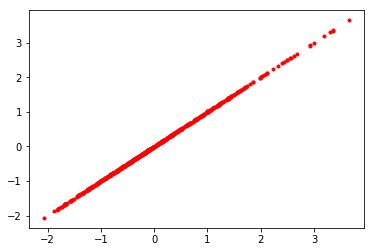

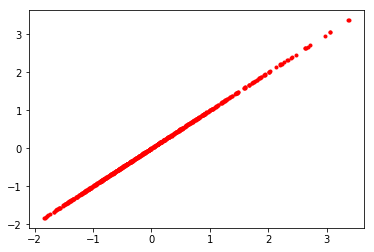

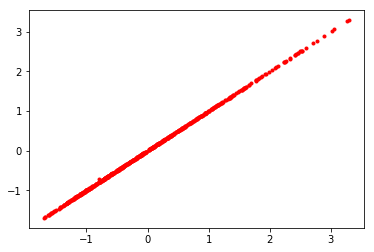

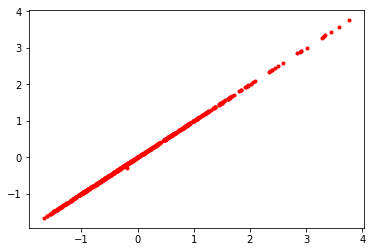

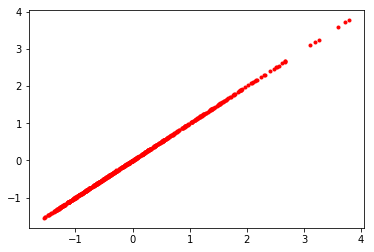

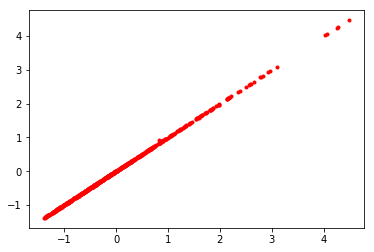

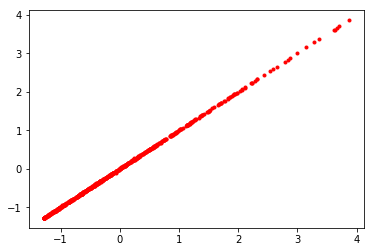

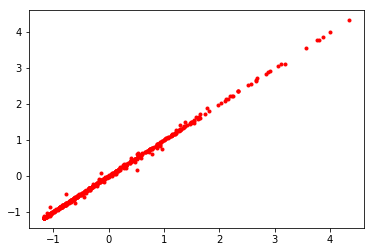

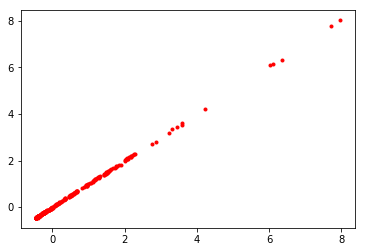

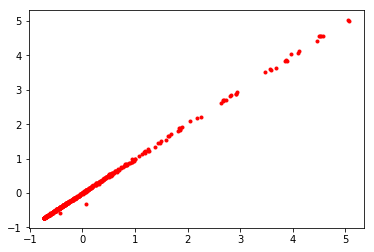

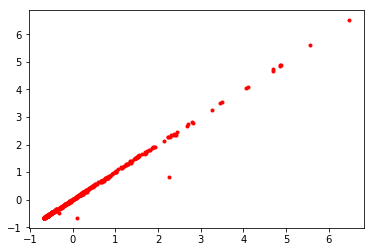

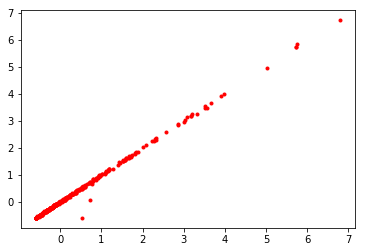

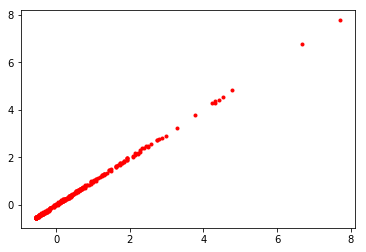

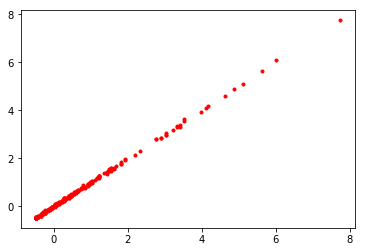

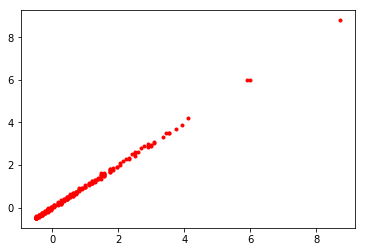

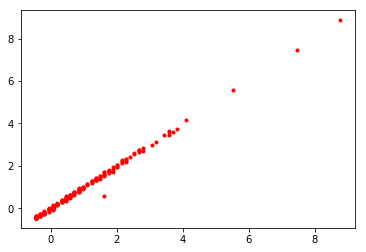

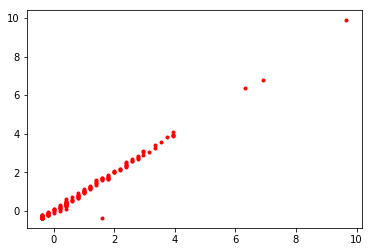

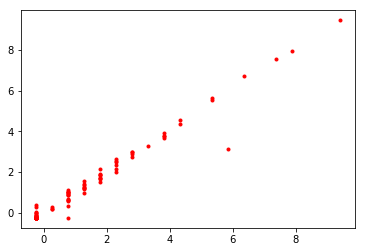

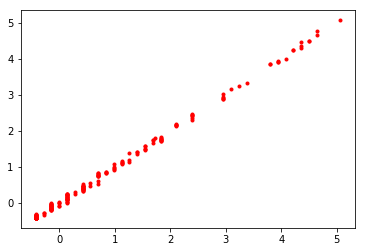

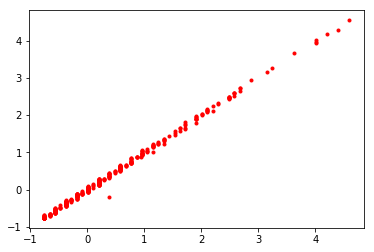

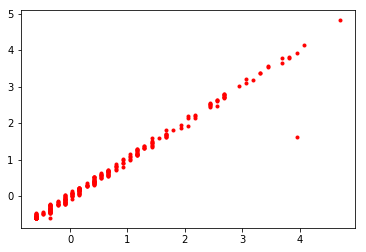

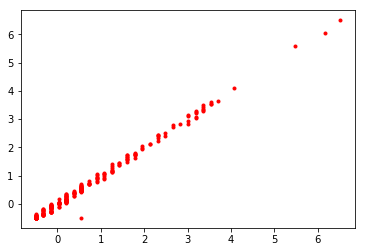

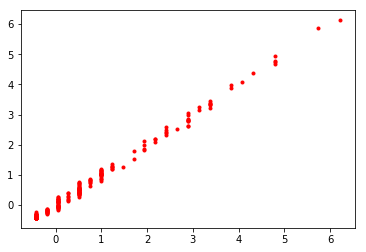

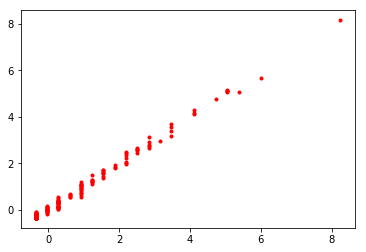

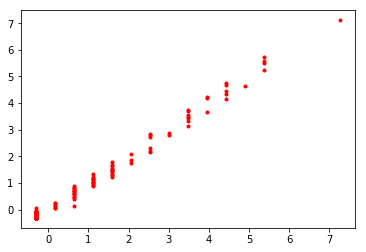

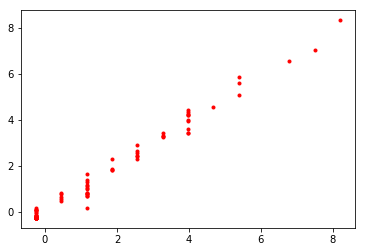

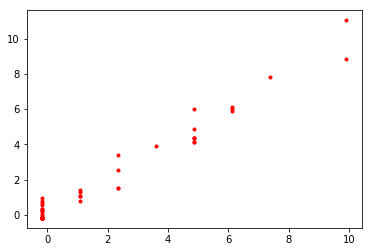

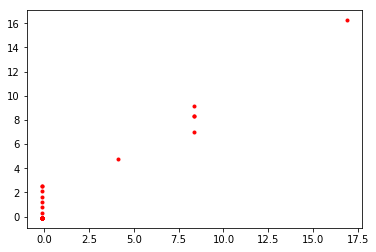

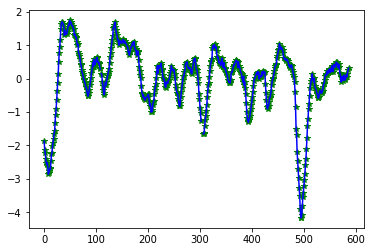

In [18]:
for i in range(Pn_py.shape[0]):
    plt.figure(i)
    #plt.plot(range(series_size),Pn_py[i,:],'b.:',range(series_size),Pn_ml[i,:],'r.')
    plt.plot(Pn_py[i,:],Pn_ml[i,:],'r.')
    plt.show

plt.figure(i+1)
plt.plot(range(series_size),Tn_py,'g*',range(series_size),Tn_ml,'b-')
plt.show